In [5]:
%matplotlib inline

from centrality.eigentrust import EigenTrust
from centrality.indegree import InDegree
from centrality.indegree_positive import InDegreePositive
from centrality.pagerank import PageRank
from evaluations.community.online_discussion_group import OnlineDiscussionGroup
from output.chart import chart
from output.metrics import print_metrics, print_stddev_metrics
from simulation.community import ActionProfile
from simulation.member import Member

# Productivity Test - Low Competence


The more basic tests are concluded with the Productivity Test, which investigates
what kind of effect different levels of productivity, all other parameters being equal,
have on the reputation score.

In [6]:
test_name = "Productivity-low"
community: OnlineDiscussionGroup = OnlineDiscussionGroup()

ALL_CENTRALITY_SCORES = [
  PageRank(),
  EigenTrust(),
  InDegree(),
  InDegreePositive()
]

# Possible Actions
actions: ActionProfile = community.action_profile

### Student Archetypes

Student with low productivity

In [7]:
low_student = Member("low", [
  (0.02, actions.post_good_comment),
  (0.18, actions.post_bad_comment),
  (0.04, actions.vote_bad_comment_negative),
  (0.36, actions.vote_any_comment_negative),
  (0.04, actions.vote_good_comment_positive),
  (0.36, actions.vote_any_comment_positive),
])
community.create_members_by_prototype(low_student, 10)

Students with medium productivity

In [8]:
avg_student = Member("avg", [
  (0.05, actions.post_good_comment),
  (0.45, actions.post_bad_comment),
  (0.025, actions.vote_bad_comment_negative),
  (0.225, actions.vote_any_comment_negative),
  (0.025, actions.vote_good_comment_positive),
  (0.225, actions.vote_any_comment_positive),
])
community.create_members_by_prototype(avg_student, 10)

Students with high productivity

In [9]:
high_student = Member("high", [
  (0.08, actions.post_good_comment),
  (0.72, actions.post_bad_comment),
  (0.01, actions.vote_bad_comment_negative),
  (0.09, actions.vote_any_comment_negative),
  (0.01, actions.vote_good_comment_positive),
  (0.09, actions.vote_any_comment_positive),
])

community.create_members_by_prototype(high_student, 10)

## Synthesis

Reputation scores are based on 100 actions by the 30 students for 100 iterations. The charts and metrics are shown below.

Progress: [##################################################] 100.0%
######## Final Metrics: InDegreePositive ########
Distinction: 12.1081188138
Correctness: 0.034482758620689655
Inversion Quality: 1.0

######## Mean & Std. Dev.: InDegreePositive ########
Distinction:       0.9610947318954232 (0.6497923324993435)
Correctness:       0.03444748278161821 (0.000189443514303143)
Inversion Quality: 0.9595333333333333 (0.027479365996244447)


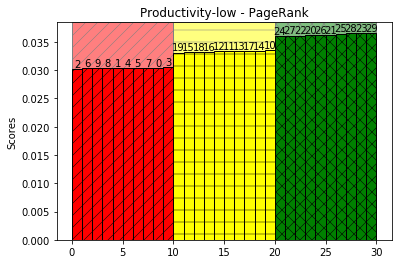

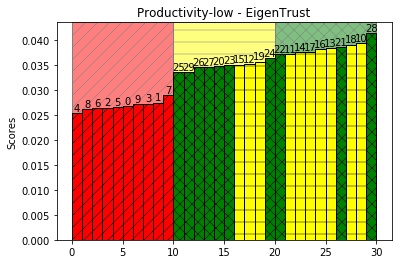

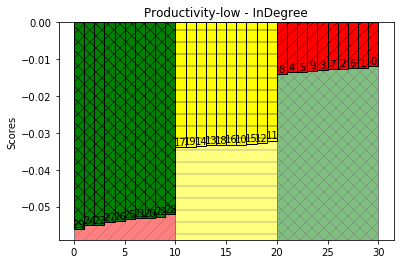

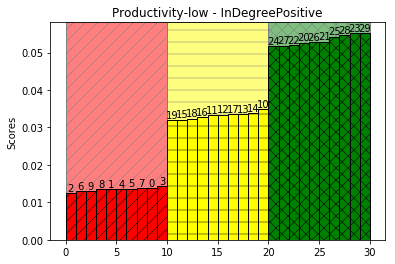

In [10]:
groups = ('low', 'avg', 'high')
colors = {'low': 'r', 'avg': 'yellow', 'high': 'g'}
results = community.simulate(ALL_CENTRALITY_SCORES, 100, 100)
for (name, result, intermediate_results) in results:
  c = chart(result, groups, colors, test_name + " - " + name)

print_metrics(name, result, groups)
print_stddev_metrics(name, intermediate_results, groups)